In [1]:
import pandas as pd
import numpy as np
import pickle
import shap
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from code_files.processing_functions import convert_to_maccs_fingerprints
from code_files.processing_functions import bit_vec_to_lst_of_lst

In [2]:
df_curated_final = pd.read_csv("datasets/curated_data/class_curated_final.csv", index_col=0)

with open('models/xgbc_df_curated_final.pkl', 'rb') as model_file:
    classifier_final = pickle.load(model_file)


In [3]:
def column_to_structure(): 
    column_to_structure_maccs = {
        1: "Index",
        2: "Isotope",
        3: "Atomic No. between 103 and 256",
        4: "Group IVA & VA & VIA Rows 4-6",
        5: "Actinide",
        6: "Group IIIB & IVB",
        7: "Lanthanide",
        8: "Group VB & VIB & VIIB ",
        9: "QAAA@1",
        10: "Group VIII",
        11: "Group IIA (Alkaline Earth)",
        12: "4M Ring",
        13: "Group IB & IIB",
        14: "ON(C)C",
        15: "S-S",
        16: "OC(O)O",
        17: "QAA@1",
        18: "CTC",
        19: "Group IIIA (B...)",
        20: "7M Ring",
        21: "SI",
        22: "C=C(Q)Q",
        23: "3M Ring",
        24: "NC(O)O",
        25: "N-O",
        26: "NC(N)N",
        27: "C$=C($A)$A",
        28: "I",
        29: "QCH2Q",
        30: "P",
        31: "CQ(C)(C)A",
        32: "QX",
        33: "CSN",
        34: "NS",
        35: "CH2=A",
        36: "Group IA (Alkali Metal)",
        37: "S Heterocycle",
        38: "NC(O)N",
        39: "NC(C)N",
        40: "OS(O)O",
        41: "S-O",
        42: "CTN",
        43: "F",
        44: "QHAQH",
        45: "Other",
        46: "C=CN",
        47: "BR",
        48: "SAN",
        49: "OQ(O)O",
        50: "Charge",
        51: "C=C(C)C",
        52: "CSO",
        53: "NN",
        54: "QHAAAQH",
        55: "QHAAQH",
        56: "OSO",
        57: "ON(O)C",
        58: "O Heterocycle",
        59: "QSQ",
        60: "Snot%A%A",
        61: "S=O",
        62: "AS(A)A",
        63: "A$A!A$A",
        64: "N=O",
        65: "A$A!S",
        66: "C%N",
        67: "CC(C)(C)A",
        68: "QS",
        69: "QHQH (&...)",
        70: "QQH",
        71: "QNQ",
        72: "NO",
        73: "OAAO",
        74: "S=A",
        75: "CH3ACH3",
        76: "A!N$A",
        77: "C=C(A)A",
        78: "NAN",
        79: "C=N",
        80: "NAAN",
        81: "NAAAN",
        82: "SA(A)A",
        83: "ACH2QH",
        84: "QAAAA@1",
        85: "NH2",
        86: "CN(C)C",
        87: "CH2QCH2",
        88: "X!A$A",
        89: "S",
        90: "OAAAO",
        91: "QHAACH2A",
        92: "QHAAACH2A",
        93: "OC(N)C",
        94: "QCH3",
        95: "QN",
        96: "NAAO",
        97: "5M Ring",
        98: "NAAAO",
        99: "QAAAAA@1",
        100: "C=C",
        101: "ACH2N",
        102: "8M Ring",
        103: "QO",
        104: "CL",
        105: "QHACH2A",
        106: "A$A($A)$A",
        107: "QA(Q)Q",
        108: "XA(A)A",
        109: "CH3AAACH2A",
        110: "ACH2O",
        111: "NCO",
        112: "NACH2A",
        113: "AA(A)(A)A",
        114: "Onot%A%A",
        115: "CH3CH2A",
        116: "CH3ACH2A",
        117: "CH3AACH2A",
        118: "NAO",
        119: "ACH2CH2A (more than 1)",
        120: "N=A",
        121: "Heterocyclic atom (more than 1)",
        122: "N Heterocycle",
        123: "AN(A)A",
        124: "OCO",
        125: "QQ",
        126: "Aromatic Ring (more than 1)",
        127: "A!O!A",
        128: "A$A!O (more than 1)",
        129: "ACH2AAACH2A",
        130: "ACH2AACH2A",
        131: "QQ (more than 1)",
        132: "QH (more than 1)",
        133: "OACH2A",
        134: "A$A!N",
        135: "X (Halogen)",
        136: "Nnot%A%A",
        137: "O=A (more than 1)",
        138: "Heterocycle",
        139: "QCH2A (more than 1)",
        140: "OH",
        141: "O (more than 3)",
        142: "CH3 (more than 2)",
        143: "N (more than 1)",
        144: "A$A!O",
        145: "Anot%A%Anot%A",
        146: "6M Ring (more than 1)",
        147: "O (more than 2)",
        148: "ACH2CH2A",
        149: "AQ(A)A",
        150: "CH3 (more than 1)",
        151: "A!A$A!A",
        152: "NH",
        153: "OC(C)C",
        154: "QCH2A",
        155: "C=O",
        156: "A!CH2!A",
        157: "NA(A)A",
        158: "C-O",
        159: "C-N",
        160: "O (more than 1)",
        161: "CH3",
        162: "N",
        163: "Aromatic",
        164: "6M Ring",
        165: "O",
        166: "Ring",
        167: "Fragments",    
    }
    return column_to_structure_maccs

In [4]:
df = convert_to_maccs_fingerprints(df_curated_final)
x_class = bit_vec_to_lst_of_lst(df, False)
df_fp = pd.DataFrame(x_class, columns=column_to_structure())
df_fp.rename(columns=column_to_structure(), inplace=True)

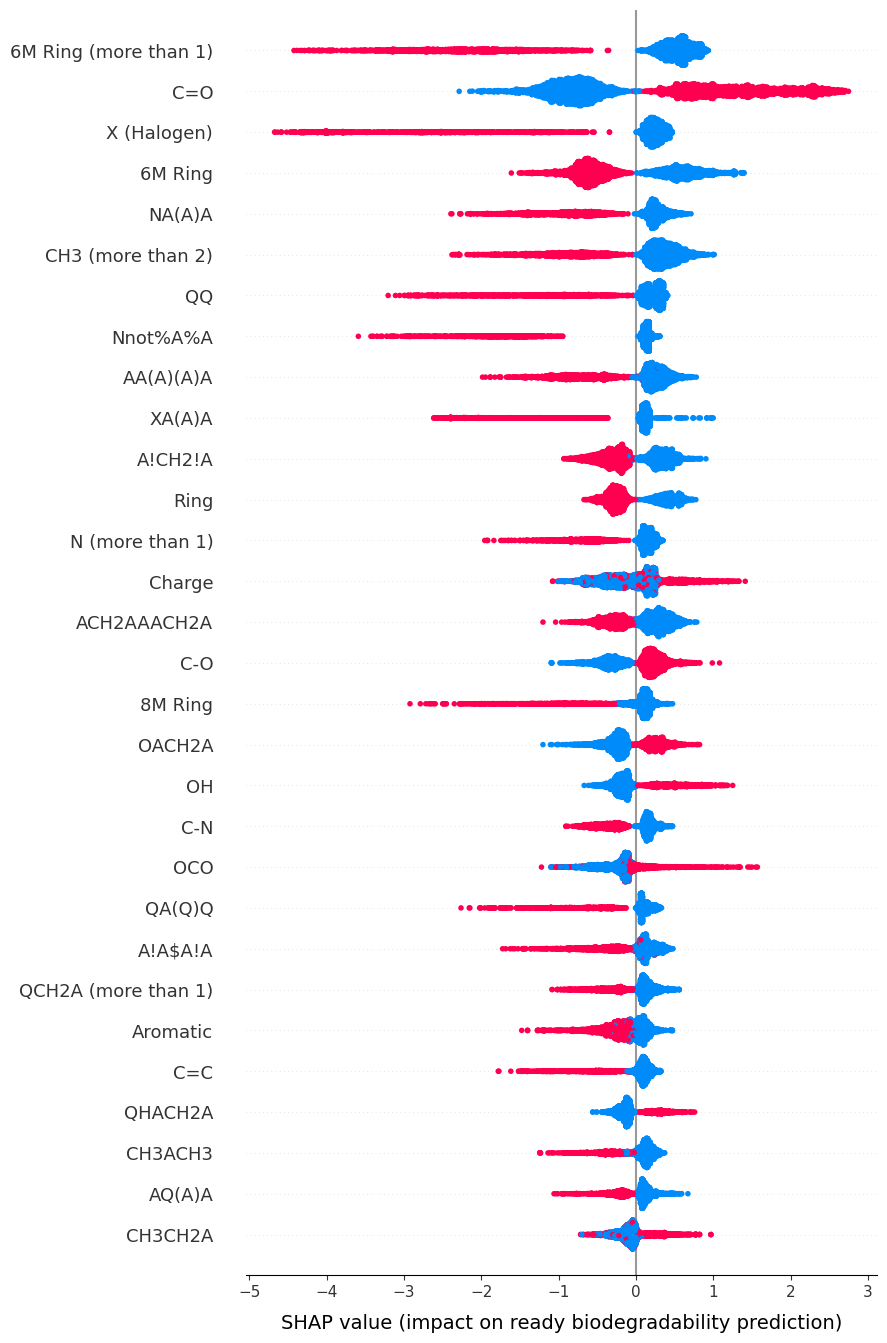

In [14]:
explainer = shap.TreeExplainer(classifier_final)
shap_values = explainer.shap_values(X=x_class)
shap.summary_plot(shap_values, features=df_fp, max_display=30, show=False)
plt.xlabel('SHAP value (impact on ready biodegradability prediction)', fontsize=14, labelpad=10)
plt.gcf().axes[-1].remove()
plt.subplots_adjust(right=1.3)
plt.savefig('figures/shap_summary_plot.png')

In [6]:
feature_name_mapping = column_to_structure()
mapped_column_names = list(feature_name_mapping.values())
shap_values_df = pd.DataFrame(shap_values, columns=mapped_column_names)

In [7]:
summary_stats = pd.DataFrame({
    'Min': shap_values_df.min(),
    'Max': shap_values_df.max(),
    'Mean': shap_values_df.mean(),
    'Median': shap_values_df.median(),
    'Absolute_Mean': shap_values_df.mean().abs(),
    'Absolute_Mean_reversed': shap_values_df.abs().mean(),
    'Absolute_Median': shap_values_df.median().abs(),
    'Std': shap_values_df.std()
})
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df = summary_stats_df.reset_index()
summary_stats_df.rename(columns={'index': 'Feature'}, inplace=True)

summary_stats_df_sorted_abs_mean = summary_stats_df.sort_values(by='Absolute_Mean_reversed', ascending=False)
summary_stats_df_sorted_abs_mean.head(5)

,Feature,Min,Max,Mean,Median,Absolute_Mean,Absolute_Mean_reversed,Absolute_Median,Std
145,6M Ring (more than 1),-4.423435,0.935609,-0.322159,0.425101,0.322159,1.073935,0.425101,1.372902
154,C=O,-2.287679,2.746053,0.217631,-0.232295,0.217631,1.073759,0.232295,1.193513
134,X (Halogen),-4.674305,0.465905,-0.386311,0.202522,0.386311,0.772228,0.202522,1.308567
163,6M Ring,-1.613403,1.396856,-0.139747,-0.429403,0.139747,0.609600,0.429403,0.636155
156,NA(A)A,-2.394701,0.710015,-0.188044,0.185639,0.188044,0.523508,0.185639,0.642299


In [8]:
df_shap_values1 = shap_values_df.copy()

for col in shap_values_df.columns:
    for i in shap_values_df.index:
        if df_fp.loc[i, col] != 1:
            df_shap_values1.loc[i, col] = np.nan

In [9]:
mean_values = df_shap_values1.mean()
positive_mean_values = mean_values[mean_values > 0]
sorted_positive_mean_values = positive_mean_values.sort_values()
top_10_features_positive = sorted_positive_mean_values.nlargest(10).index
top_10_df_positive = df_shap_values1[top_10_features_positive]

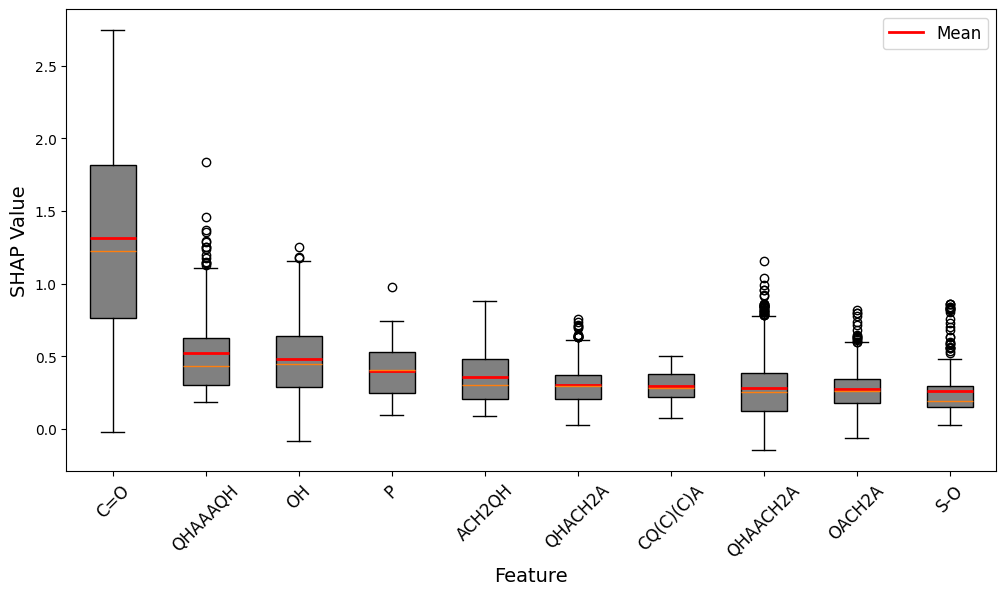

In [10]:

plt.figure(figsize=(12, 6))

# Drop NaN values from each feature before plotting
box = plt.boxplot([top_10_df_positive[feature].dropna() for feature in top_10_features_positive], 
                  tick_labels=top_10_features_positive, patch_artist=True)

for patch in box['boxes']:
    patch.set_facecolor('grey')

means = [np.mean(top_10_df_positive[feature].dropna()) for feature in top_10_features_positive]

for i, mean in enumerate(means):
    plt.hlines(y=mean, xmin=i+0.75, xmax=i+1.25, color='red', linewidth=2)

mean_line = mlines.Line2D([], [], color='red', linewidth=2, label='Mean')

plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('SHAP Value', fontsize=14)
plt.legend(handles=[mean_line], loc='upper right', fontsize=12)
plt.savefig('figures/shap_mean_positive.png')

In [11]:
mean_values = df_shap_values1.mean()
negative_mean_values = mean_values[mean_values < 0]
sorted_negative_mean_values = negative_mean_values.sort_values(ascending=True)
top_10_features_negative = sorted_negative_mean_values.head(10).index
top_10_df_negative = df_shap_values1[top_10_features_negative]

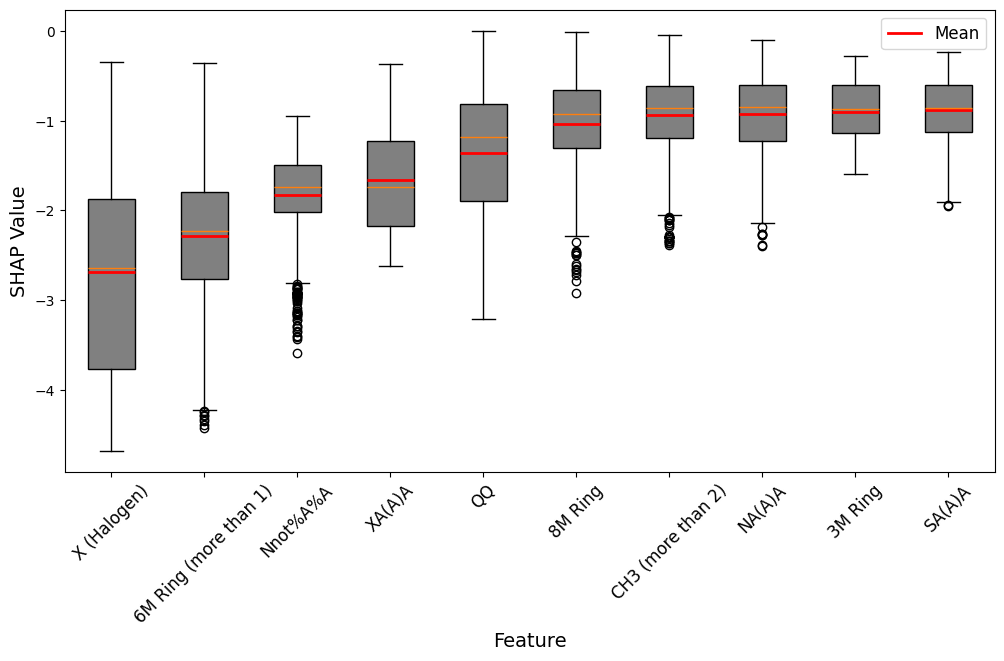

In [12]:
plt.figure(figsize=(12, 6))

# Drop NaN values from each feature before plotting
box = plt.boxplot([top_10_df_negative[feature].dropna() for feature in top_10_features_negative], 
                  tick_labels=top_10_features_negative, patch_artist=True)

for patch in box['boxes']:
    patch.set_facecolor('grey')

means = [np.mean(top_10_df_negative[feature].dropna()) for feature in top_10_features_negative]

for i, mean in enumerate(means):
    plt.hlines(y=mean, xmin=i+0.75, xmax=i+1.25, color='red', linewidth=2)

mean_line = mlines.Line2D([], [], color='red', linewidth=2, label='Mean')

plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('SHAP Value', fontsize=14)
plt.legend(handles=[mean_line], loc='upper right', fontsize=12)
plt.savefig('figures/shap_mean_negative.png')